<a href="https://colab.research.google.com/github/radhakrishnan-omotec/prediction-repo/blob/main/Colab_Prediction_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PricePrediction Linear Regression & Random Forest

In [3]:
!git clone https://github.com/radhakrishnan-omotec/prediction-repo.git

Cloning into 'prediction-repo'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 721.41 KiB | 1.62 MiB/s, done.


In [4]:
cd /content/prediction-repo

/content/prediction-repo


In [9]:
import os
import pandas as pd
import numpy as np


dataset=pd.read_csv("kc_house_data.csv")
data=dataset.copy()


data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
dell=["id","date"]
data=data.drop(dell,axis=1)

'''

data.isnull().sum()
sum(data["sqft_living"]<1000)
sum(data["sqft_living"]>10000)
sum(data["sqft_lot"]<2000)
sum(data["sqft_lot"]>50000)
sum(data["sqft_above"]<500)
sum(data["sqft_above"]>4000)
sum(data["sqft_basement"]>2000)
sum(data["sqft_living15"]<900)
sum(data["sqft_living15"]>3500)
data=data[(data["sqft_living"]>=1000) & (data["sqft_living"]<=10000) & (data["sqft_lot"]>=2000) & (data["sqft_lot"]<=50000) & (data["sqft_above"]>=500) & (data["sqft_above"]<=4000)]
data=data[(data["sqft_basement"]<=2000) & (data["sqft_living15"]<=3500) & (data["sqft_living15"]>=900)]


'''

'\n\ndata.isnull().sum()\nsum(data["sqft_living"]<1000)\nsum(data["sqft_living"]>10000)\nsum(data["sqft_lot"]<2000)\nsum(data["sqft_lot"]>50000)\nsum(data["sqft_above"]<500)\nsum(data["sqft_above"]>4000)\nsum(data["sqft_basement"]>2000)\nsum(data["sqft_living15"]<900)\nsum(data["sqft_living15"]>3500)\ndata=data[(data["sqft_living"]>=1000) & (data["sqft_living"]<=10000) & (data["sqft_lot"]>=2000) & (data["sqft_lot"]<=50000) & (data["sqft_above"]>=500) & (data["sqft_above"]<=4000)]\ndata=data[(data["sqft_basement"]<=2000) & (data["sqft_living15"]<=3500) & (data["sqft_living15"]>=900)]\n\n\n'

In [12]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
data["yr_built"].describe()
data["age"]=2016-data["yr_built"]
data["age"].describe()
#data=data[(data["age"]>=10)]
data=data.drop("yr_built",axis=1)
data1=data.copy()
for i in range(0,21597):
  if(data1["yr_renovated"][i]>0):
    data1["yr_renovated"][i]=1

data1.describe()

<ipython-input-13-b165891182ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["yr_renovated"][i]=1


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,0.042321,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,45.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.201324,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,19.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,41.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,65.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,116.000000


In [14]:
colmn=list(data1.columns)
print("column=",colmn)
feature= list(set(colmn)-set(["price"]))
print("feature=",feature)

y1=data1["price"].values
x1=data1[feature].values

y1=np.log(y1)
print()
print("x1=",x1)
print("y1=",y1)

column= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
feature= ['long', 'yr_renovated', 'grade', 'floors', 'lat', 'bathrooms', 'sqft_lot', 'view', 'sqft_lot15', 'sqft_living', 'zipcode', 'age', 'condition', 'sqft_basement', 'sqft_above', 'sqft_living15', 'bedrooms', 'waterfront']

x1= [[-1.22257e+02  0.00000e+00  7.00000e+00 ...  1.34000e+03  3.00000e+00
   0.00000e+00]
 [-1.22319e+02  1.00000e+00  7.00000e+00 ...  1.69000e+03  3.00000e+00
   0.00000e+00]
 [-1.22233e+02  0.00000e+00  6.00000e+00 ...  2.72000e+03  2.00000e+00
   0.00000e+00]
 ...
 [-1.22299e+02  0.00000e+00  7.00000e+00 ...  1.02000e+03  2.00000e+00
   0.00000e+00]
 [-1.22069e+02  0.00000e+00  8.00000e+00 ...  1.41000e+03  3.00000e+00
   0.00000e+00]
 [-1.22299e+02  0.00000e+00  7.00000e+00 ...  1.02000e+03  2.00000e+00
   0.00000e+00]]
y1= [

In [15]:
from  sklearn.preprocessing import StandardScaler
sn= StandardScaler();
x1=sn.fit_transform(x1)
print("x1===",x1)

x1=== [[-0.30569514 -0.21021627 -0.56080027 ... -0.94367562 -0.40290302
  -0.08720516]
 [-0.74628553  4.75700566 -0.56080027 ... -0.43288674 -0.40290302
  -0.08720516]
 [-0.13514402 -0.21021627 -1.41318983 ...  1.07029196 -1.48249316
  -0.08720516]
 ...
 [-0.6041596  -0.21021627 -0.56080027 ... -1.41068259 -1.48249316
  -0.08720516]
 [ 1.03028865 -0.21021627  0.2915893  ... -0.84151784 -0.40290302
  -0.08720516]
 [-0.6041596  -0.21021627 -0.56080027 ... -1.41068259 -1.48249316
  -0.08720516]]


In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [17]:
train_x,test_x,train_y,test_y= train_test_split(x1,y1,test_size=0.3,random_state=0)

lr=LinearRegression()
model=lr.fit(train_x,train_y)

print("Linear Regression Score ::")
print(lr.score(test_x, test_y))

r2test=model.score(test_x,test_y)
r2train=model.score(train_x,train_y)
print("Linear Regression r2train,r2test == ",r2train,r2test)
prediction=lr.predict(test_x)

Linear Regression Score ::
0.7719491092611657
Linear Regression r2train,r2test ==  0.7697313262326146 0.7719491092611657


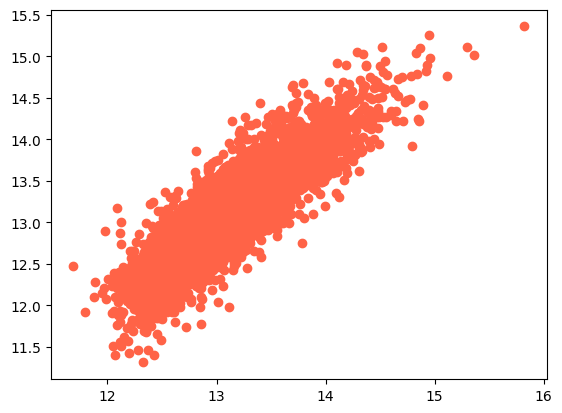

In [18]:
import matplotlib.pyplot as plt
plt.scatter(prediction, test_y, color = 'tomato')
#plt.plot(prediction, test_y, color = 'blue')
plt.show()

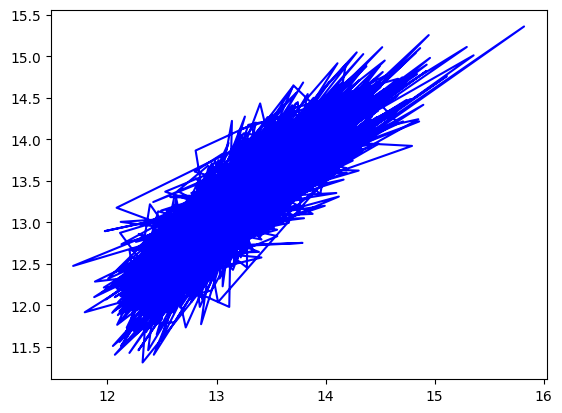

In [19]:
plt.plot(prediction, test_y, color = 'blue')
plt.show()

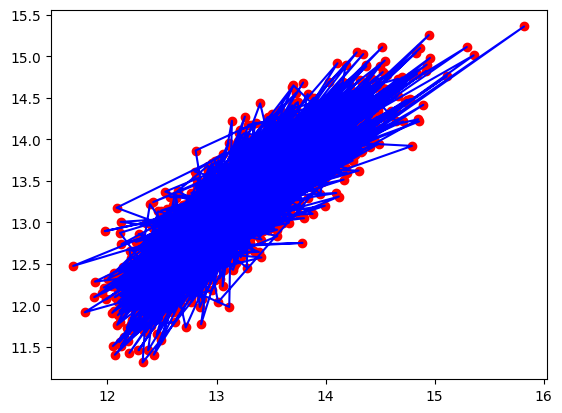

In [20]:
plt.scatter(prediction, test_y, color = 'red')
plt.plot(prediction, test_y, color = 'blue')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_features="auto",max_depth=100,min_samples_leaf=4,min_samples_split=10,random_state=1)
model1=rf.fit(train_x,train_y)
print("RandomForestRegressor Score::")
print(rf.score(test_x, test_y))
prediction_rf=rf.predict(test_x)
print("prediction = ",prediction_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor Score::
0.8851828998137417
prediction =  [13.58649068 13.23076913 13.60423388 ... 13.46227564 13.21204292
 13.47105758]


In [22]:
r2test1=model1.score(test_x,test_y)
r2train1=model1.score(train_x,train_y)
print("r2train1,r2test1 = ",r2train1,r2test1)

r2train1,r2test1 =  0.9521186294091598 0.8851828998137417


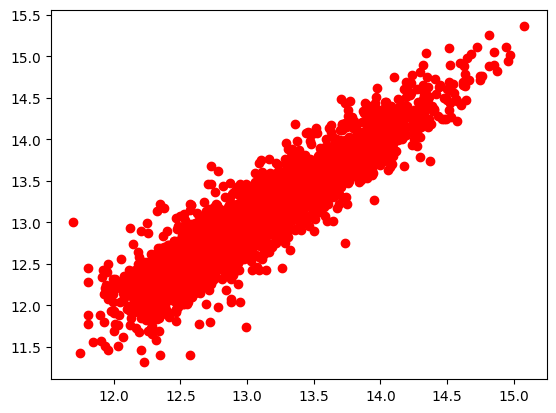

In [23]:
plt.scatter(prediction_rf, test_y, color = 'red')
#plt.plot(predictioplt.scatter(prediction_rf, test_y, color = 'red')
#plt.plot(prediction_rf, test_y, color = 'blue')
#plt.show(n_rf, test_y, color = 'blue')
plt.show()

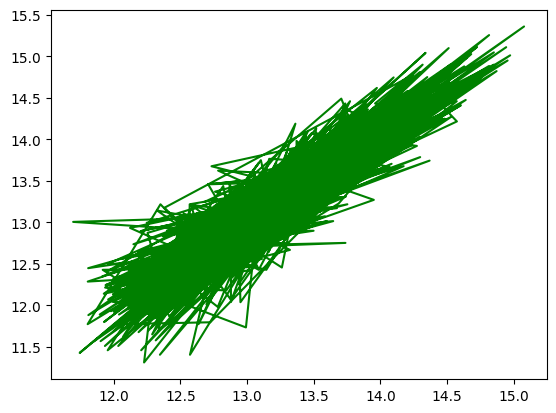

In [24]:
#plt.scatter(prediction_rf, test_y, color = 'red')
plt.plot(prediction_rf, test_y, color = 'green')
plt.show()

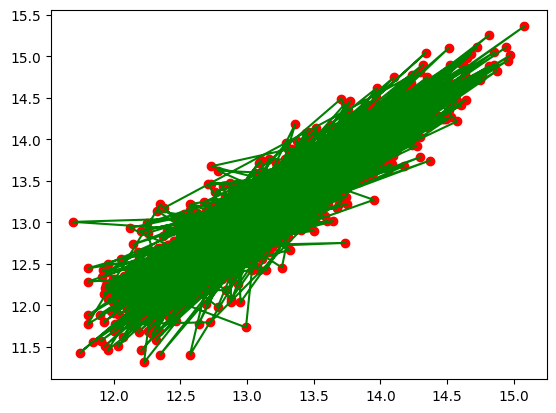

In [25]:
plt.scatter(prediction_rf, test_y, color = 'red')
plt.plot(prediction_rf, test_y, color = 'green')
plt.show()

In [29]:
for loop in range(0,51):
  print("Loop ", loop ,"Prediction ", prediction_rf[loop])

Loop  0 Prediction  13.586490684575914
Loop  1 Prediction  13.230769132619695
Loop  2 Prediction  13.604233880536055
Loop  3 Prediction  12.238987012963007
Loop  4 Prediction  13.114435811168317
Loop  5 Prediction  13.42209910160919
Loop  6 Prediction  13.172635892285433
Loop  7 Prediction  13.021303653587674
Loop  8 Prediction  12.904633085543601
Loop  9 Prediction  13.648938003515035
Loop  10 Prediction  12.393087145384843
Loop  11 Prediction  14.352750016615202
Loop  12 Prediction  12.308015635451403
Loop  13 Prediction  13.540776363137416
Loop  14 Prediction  12.990630385087464
Loop  15 Prediction  12.495842405688347
Loop  16 Prediction  12.897550199993189
Loop  17 Prediction  12.152328828308272
Loop  18 Prediction  13.662395326251053
Loop  19 Prediction  12.272408262160063
Loop  20 Prediction  12.31186138469739
Loop  21 Prediction  12.468012627039155
Loop  22 Prediction  13.4779890822943
Loop  23 Prediction  14.169013115187225
Loop  24 Prediction  13.188164945377316
Loop  25 Predi